Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-10-2adf4e85fea7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diagnosis', y='Discharges', data= df, palette='pastel')


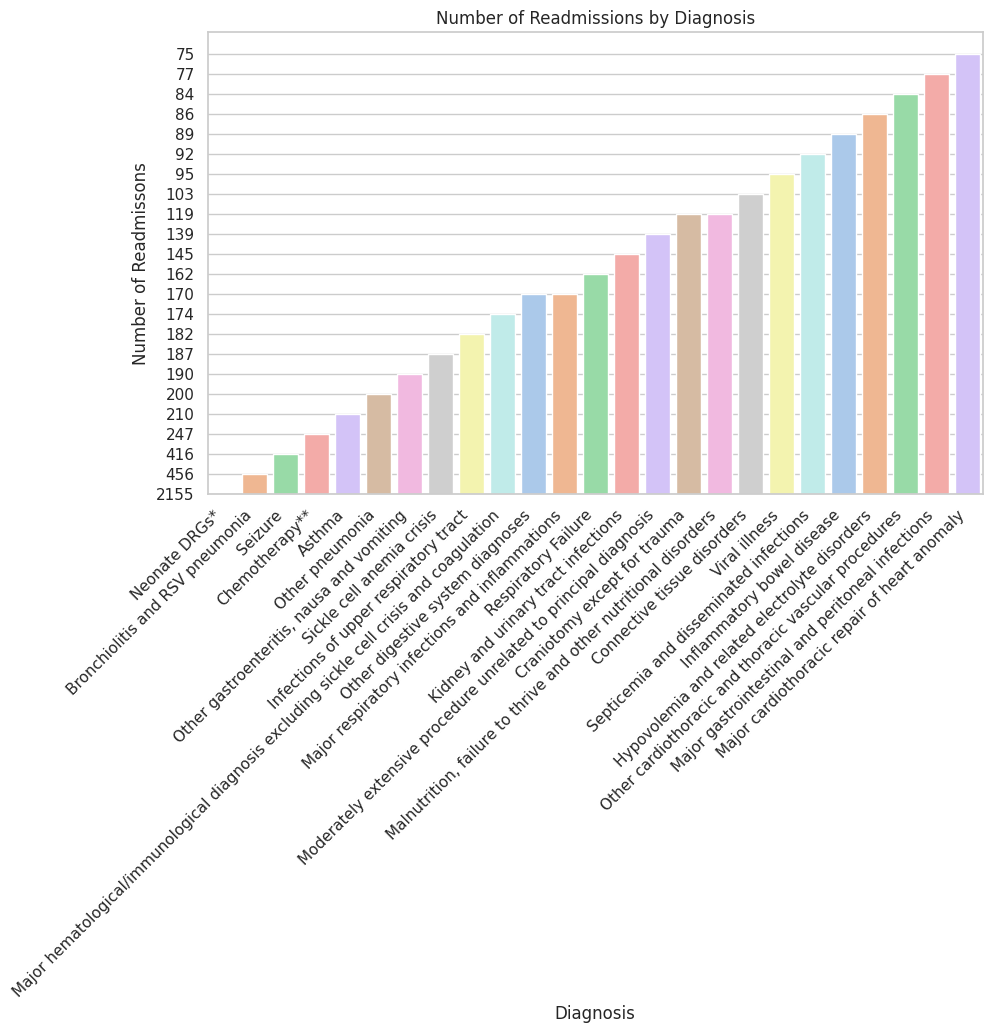

Logistic Regression Model:
              precision    recall  f1-score   support

         119       1.00      1.00      1.00         1
         170       1.00      1.00      1.00         1
         182       0.00      0.00      0.00         1
         190       0.00      0.00      0.00         0
        2155       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.33      0.33      0.33         5
weighted avg       0.40      0.40      0.40         5

Naive Bayes Model:
              precision    recall  f1-score   support

         103       0.00      0.00      0.00         0
         119       1.00      1.00      1.00         1
         170       1.00      1.00      1.00         1
         182       0.00      0.00      0.00         1
        2155       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         1

    accuracy                   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

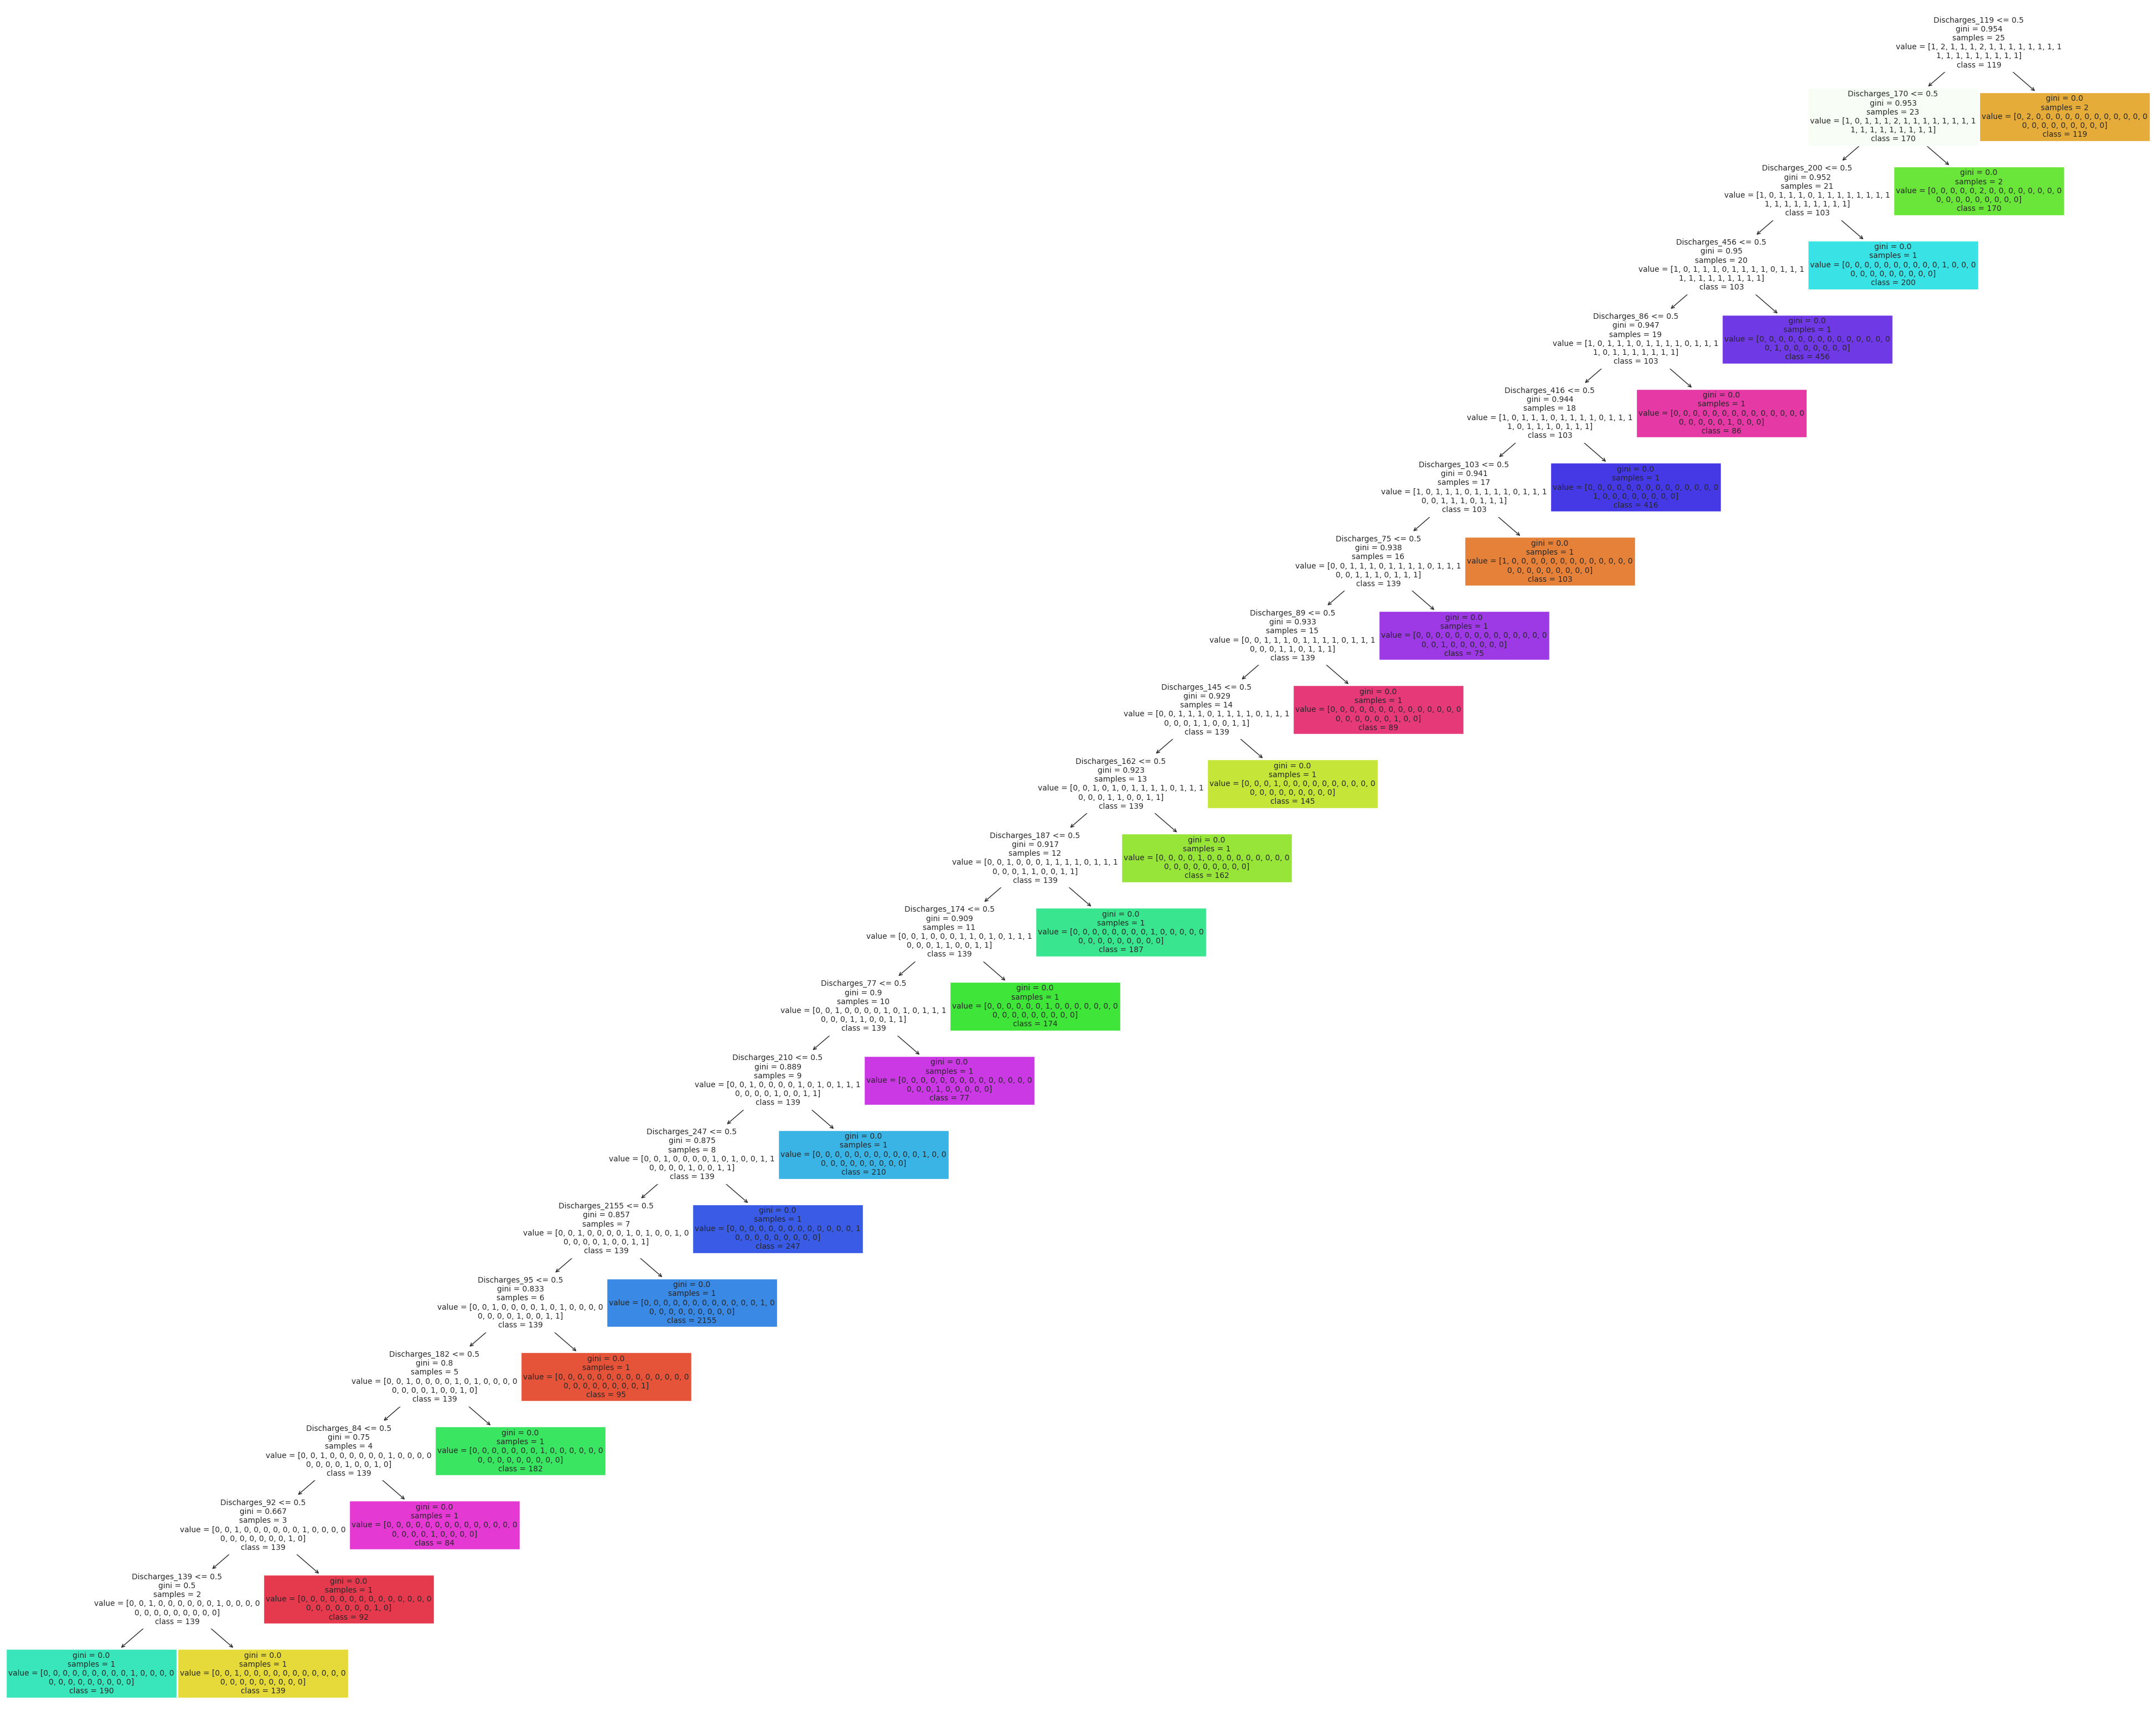

Decision Tree Model:
              precision    recall  f1-score   support

         119       1.00      1.00      1.00         1
         170       1.00      1.00      1.00         1
         182       1.00      1.00      1.00         1
        2155       1.00      1.00      1.00         1
          77       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Linear Regression Model:
Mean Squared Error: 788320.7614999999
R^2 Score: -0.20726735515592942
                            OLS Regression Results                            
Dep. Variable:             Discharges   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 13 Apr 2024   Prob (F-statistic):                nan


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1529: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


all_sheets =pd.read_excel('/content/drive/My Drive/Colab Notebooks/Pediatric-Readmissions-Databook-2023.xlsx', sheet_name=None)


df = all_sheets['Top Diagnoses']


import matplotlib.pyplot as plt
import seaborn as sns


df['Discharges'] = df['Discharges'].astype(str)
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Diagnosis', y='Discharges', data= df, palette='pastel')


plt.gca().invert_yaxis()


plt.xlabel('Diagnosis')
plt.ylabel('Number of Readmissons')
plt.title('Number of Readmissions by Diagnosis')


plt.xticks(rotation=45, ha='right')

plt.show()


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm



X= df.drop(columns=['Diagnosis'])
y= df['Discharges']

X_encoded = pd.get_dummies(X)

X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train_encoded, y_train)


y_pred = model.predict(X_test_encoded)

print("Logistic Regression Model:")
print(classification_report(y_test, y_pred))


nb_classifier = GaussianNB()
nb_classifier.fit(X_train_encoded, y_train)

nb_y_pred = nb_classifier.predict(X_test_encoded)

print("Naive Bayes Model:")
print(classification_report(y_test, nb_y_pred))

clf = DecisionTreeClassifier()

clf.fit(X_encoded, y)


plt.figure(figsize=(50, 40))
plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=list(map(str, clf.classes_)))
plt.show()

dt_y_pred = clf.predict(X_test_encoded)

print("Decision Tree Model:")
print(classification_report(y_test, dt_y_pred))

regression_model = LinearRegression()
regression_model.fit(X_train_encoded, y_train)

y_pred = regression_model.predict(X_test_encoded)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

X_train_encoded = sm.add_constant(X_train_encoded)
regression_model_sm = sm.OLS(y_train.astype(float), X_train_encoded.astype(float)).fit()
print(regression_model_sm.summary())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 2000x1600 with 0 Axes>

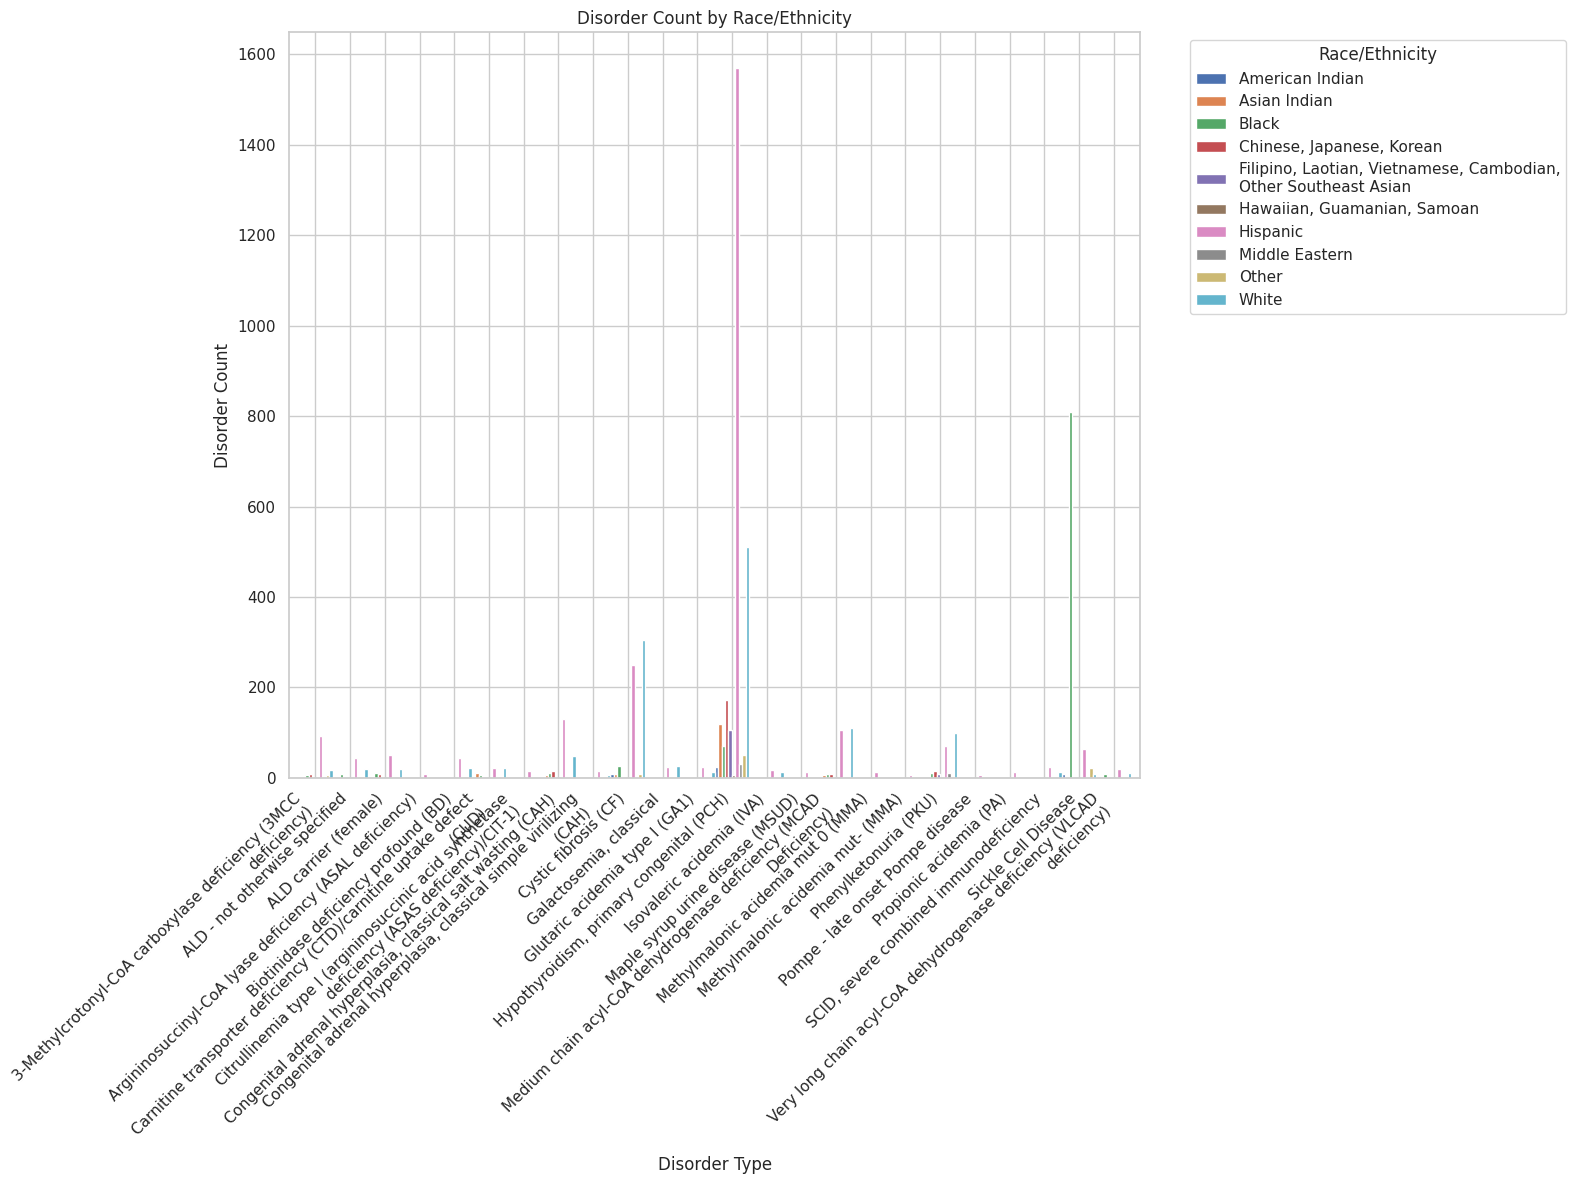

Naive Bayes Model:
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         2
           8       0.17      1.00      0.29         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          21       0.33      1.00      0.50         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         0
          48       0.00      0.00      0.00         1
          93       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         0
         131       0.00      0.00      0.00         1

    accuracy                           0.20        15
   macro avg       0.10      0.20      0.12        15
weighte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

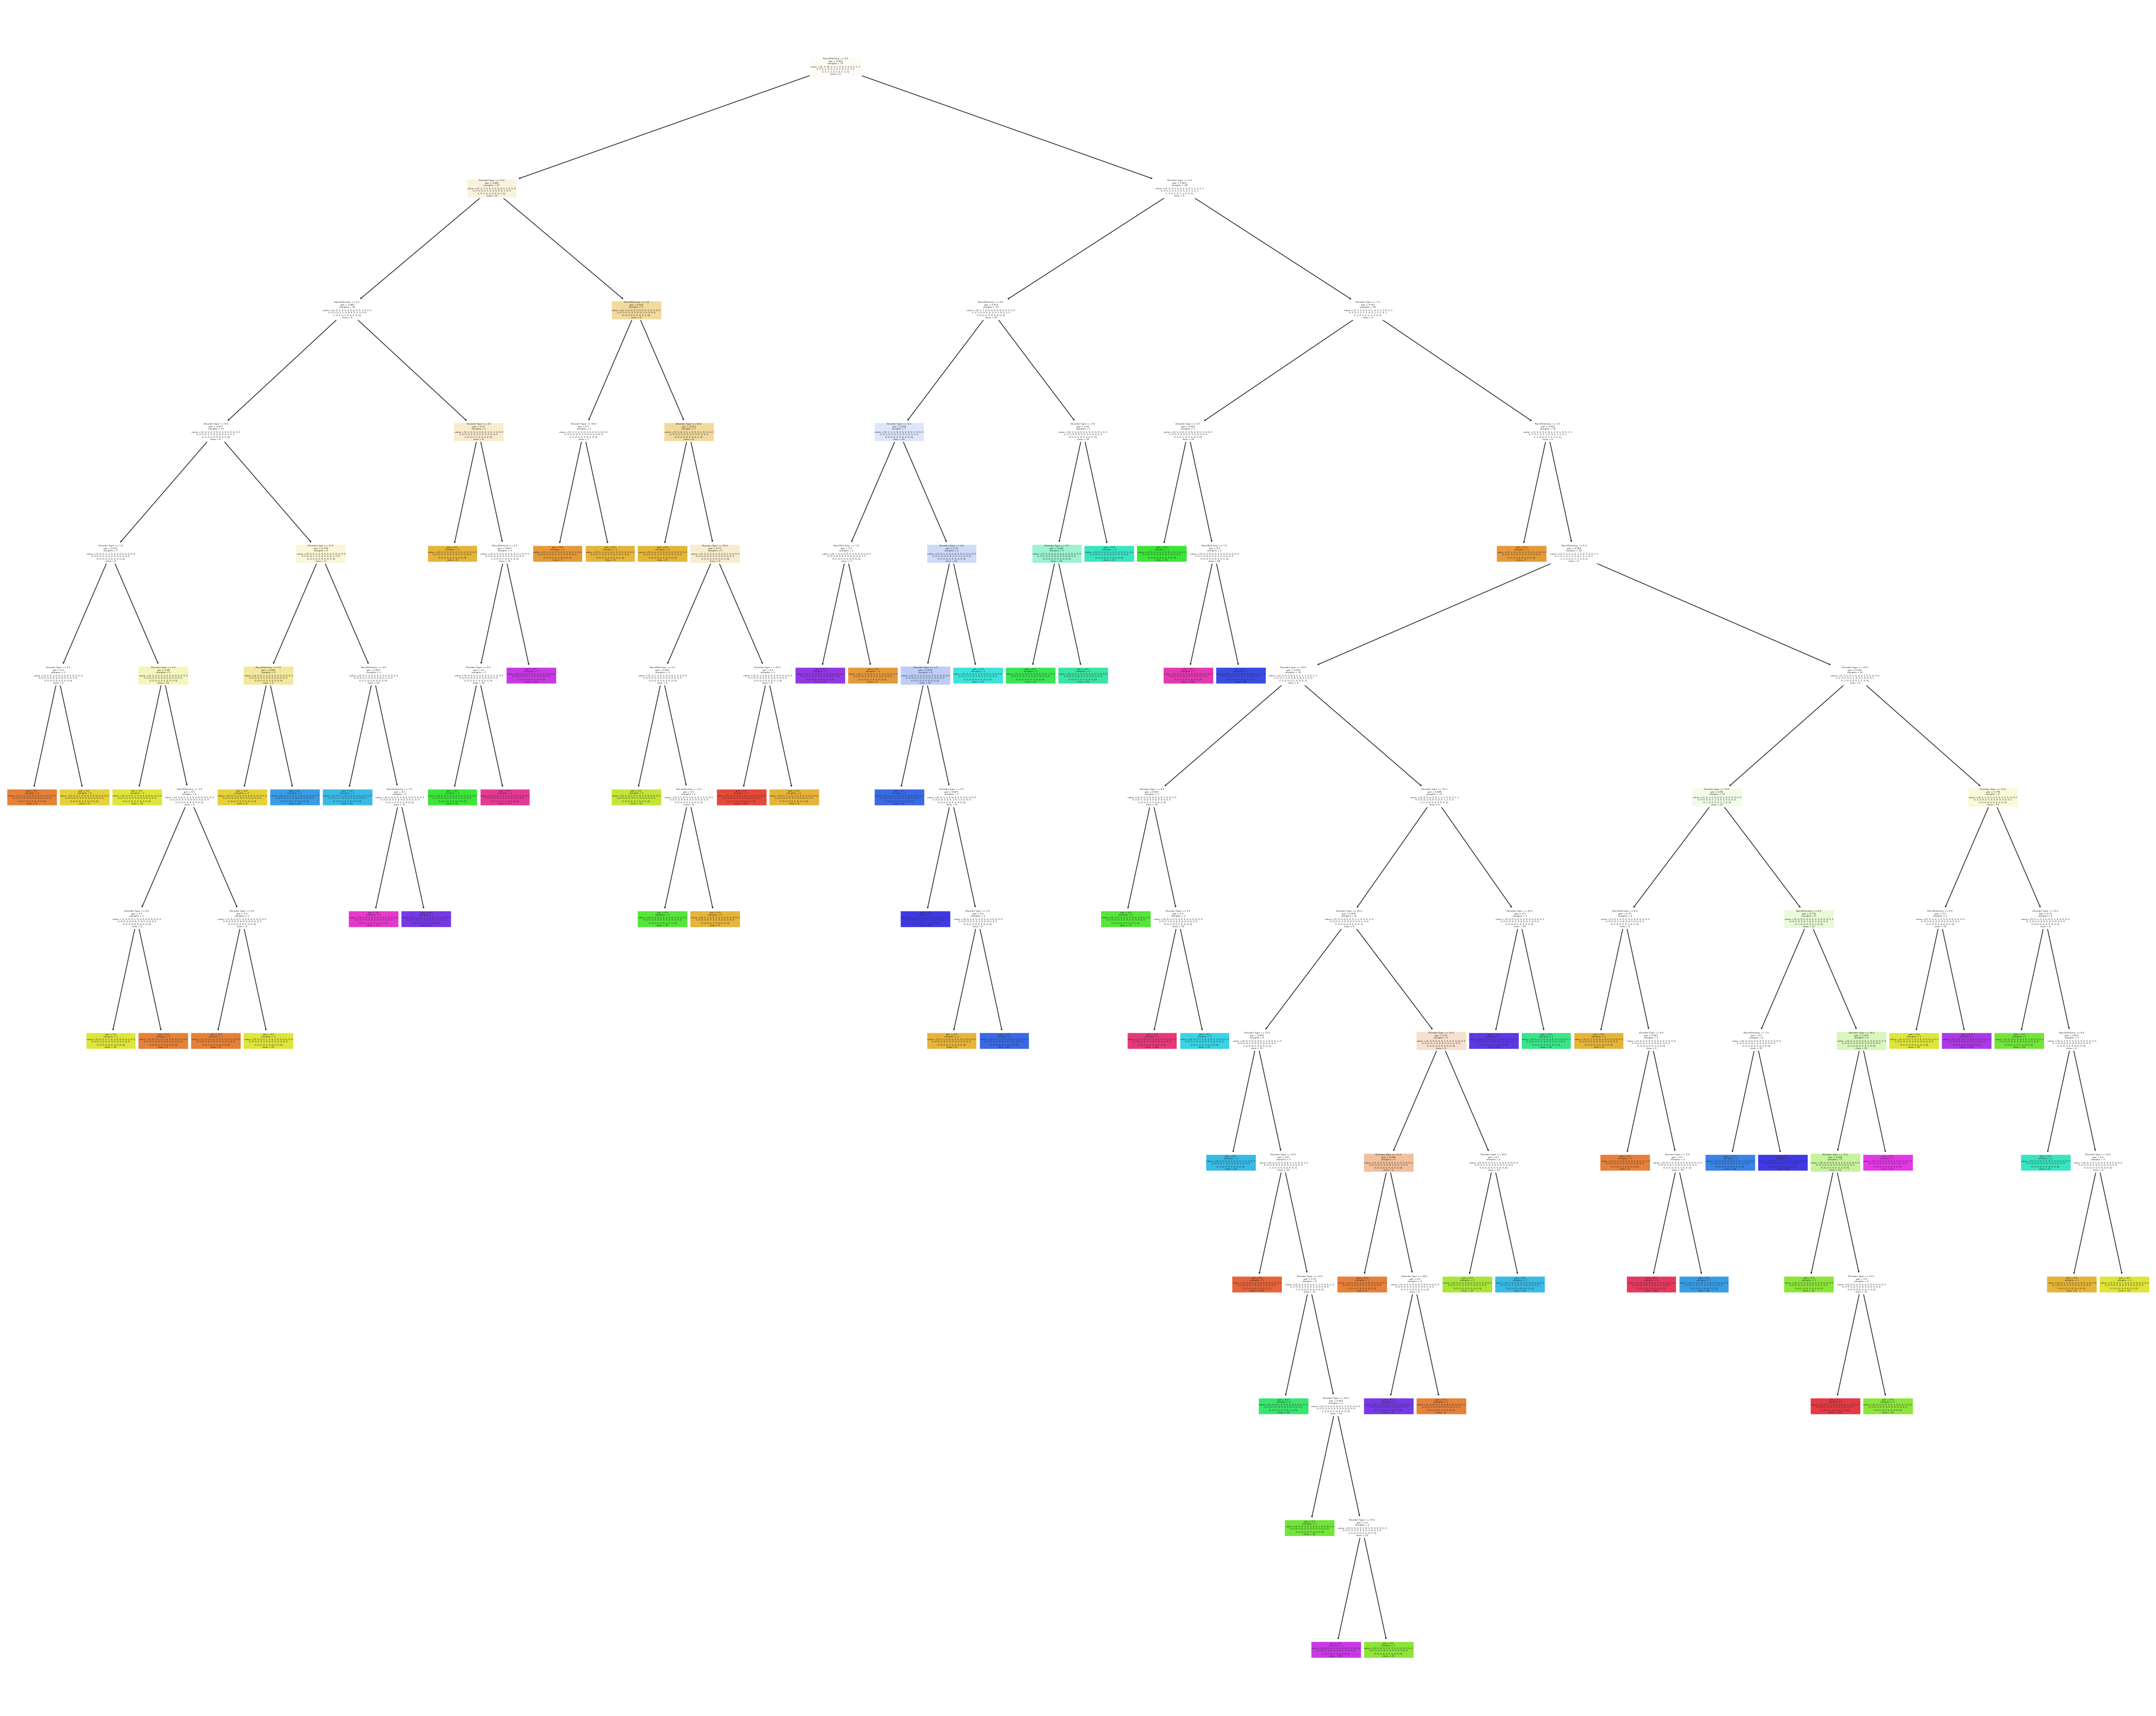

Decision Tree Model:
              precision    recall  f1-score   support

           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          48       1.00      1.00      1.00         1
          93       1.00      1.00      1.00         1
         131       1.00      1.00      1.00         1

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


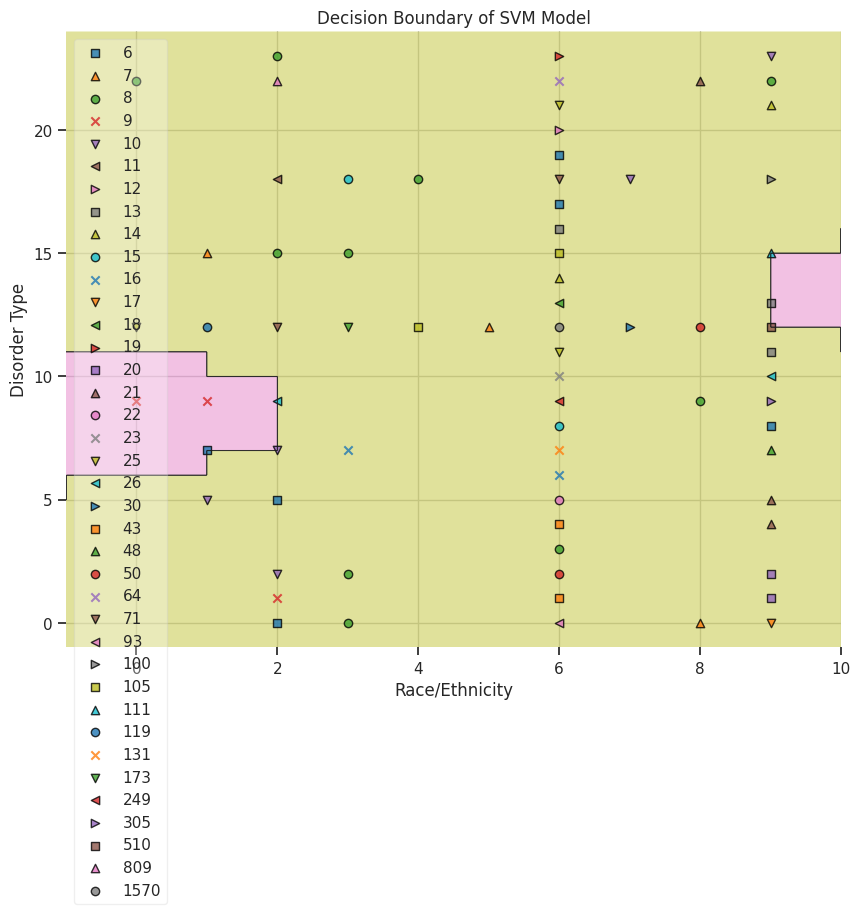

Support Vector Machine Model:
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         2
           8       0.07      1.00      0.12         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         1
          93       0.00      0.00      0.00         1
         131       0.00      0.00      0.00         1

    accuracy                           0.07        15
   macro avg       0.01      0.08      0.01        15
weighted avg       0.00      0.07      0.01        15

Linear Regression Model:
Mean Squared Error: 4092.2680440838667
R^2 Score: -2.3011153931496398
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

data_frame= pd.read_excel('/content/drive/My Drive/Colab Notebooks/newborn-screening-disorders-californiaraceethnicity-2009-2019_final.xlsx')

grouped_data = data_frame.groupby(['Race/Ethnicity', 'Disorder Type'])['Disorder Count'].sum().reset_index()

pivot_data = grouped_data.pivot(index='Disorder Type', columns='Race/Ethnicity', values='Disorder Count')

plt.figure(figsize=(20, 16))
pivot_data.plot(kind='bar', figsize= (16, 12), width=1.0)
plt.xlabel('Disorder Type')
plt.ylabel('Disorder Count')
plt.title('Disorder Count by Race/Ethnicity')
plt.legend(title='Race/Ethnicity', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

X_cols = ['Race/Ethnicity', 'Disorder Type']
y_col = 'Disorder Count'

X = data_frame[X_cols]
y = data_frame[y_col]

label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


nb_classifier = GaussianNB()
nb_classifier.fit(X_train_encoded, y_train)

nb_y_pred = nb_classifier.predict(X_test_encoded)

print("Naive Bayes Model:")
print(classification_report(y_test, nb_y_pred))

clf = DecisionTreeClassifier()

clf.fit(X_encoded, y)


plt.figure(figsize=(50, 40))
plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=list(map(str, clf.classes_)))
plt.show()

dt_y_pred = clf.predict(X_test_encoded)

print("Decision Tree Model:")
print(classification_report(y_test, dt_y_pred))


svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train_encoded, y_train)
svm_y_pred = svm_model.predict(X_test_encoded)


feature_names = X_encoded.columns

X_visualization = X_encoded.iloc[:, :2]

svm_model.fit(X_visualization, y)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_visualization.values, y.values, clf=svm_model, legend=2)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Decision Boundary of SVM Model')
plt.show()

print("Support Vector Machine Model:")
print(classification_report(y_test, svm_y_pred))

regression_model = LinearRegression()
regression_model.fit(X_train_encoded, y_train)

y_pred = regression_model.predict(X_test_encoded)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

X_train_encoded = sm.add_constant(X_train_encoded)
regression_model_sm = sm.OLS(y_train.astype(float), X_train_encoded.astype(float)).fit()
print(regression_model_sm.summary())

